In [11]:
import numpy as np
import matplotlib.pyplot as plt

## (c)

In [34]:
# Initialize parameters
m, n = 500, 1000
A = np.random.randn(m, n)
b = np.ones((m, 1))  # Make sure b is a column vector

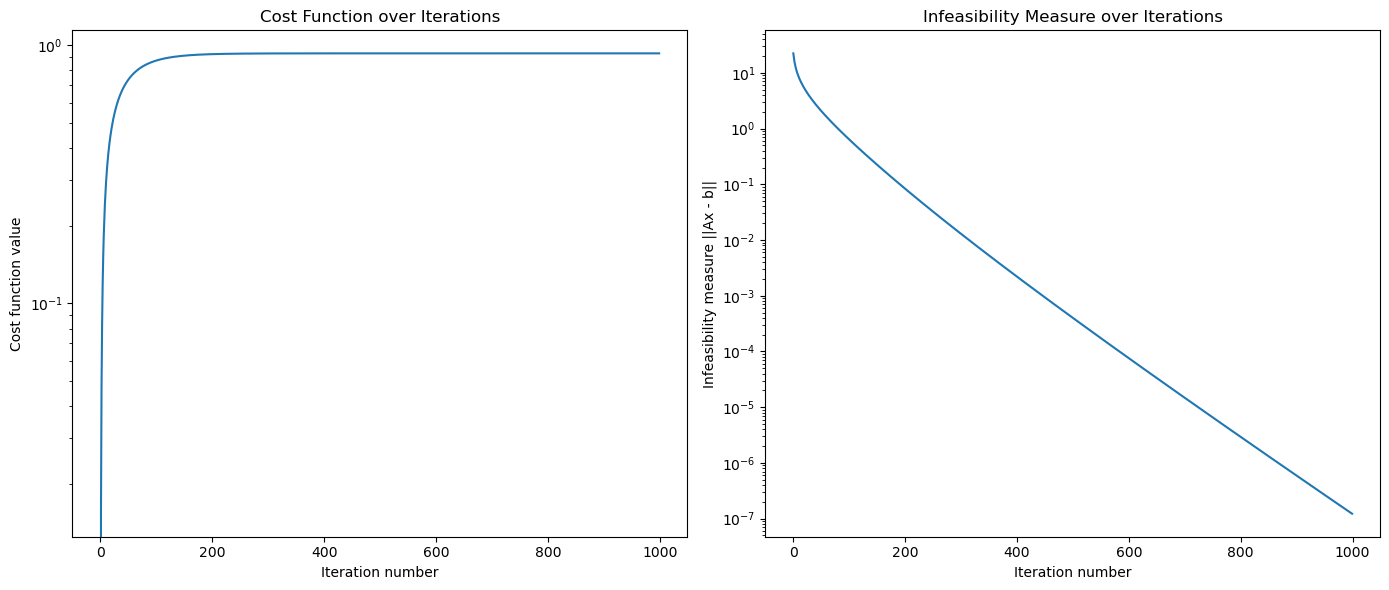

In [35]:
def update_x_da(A, lamb):
    # setting gradient to 0 and solve for x
    return -0.5 * A.T @ lamb

def update_lambda_da(lamb, A, x, b, alpha):
    return lamb + alpha * (A @ x - b)

def cost_function(x):
    return np.dot(x.T, x)

# Dual ascent algorithm
def dual_ascent(A, b, alpha, epochs=1000):
    lamb = np.zeros((m, 1))  # Initial lambda
    cost_history = []
    infeasibility_history = []

    for _ in range(epochs):
        x = update_x_da(A, lamb)
        lamb = update_lambda_da(lamb, A, x, b, alpha)
        
        cost_history.append(cost_function(x).item())
        infeasibility_history.append(np.linalg.norm(A @ x - b).item())

    return cost_history, infeasibility_history

# Run the algorithm
alpha = 1 / np.linalg.norm(A, ord=2)**2
cost_history, infeasibility_history = dual_ascent(A, b, alpha, epochs=1000)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Cost Function over Iterations')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(infeasibility_history)
plt.xlabel('Iteration number')
plt.ylabel('Infeasibility measure ||Ax - b||')
plt.title('Infeasibility Measure over Iterations')
plt.yscale('log')

plt.tight_layout()
plt.show()


## (d)

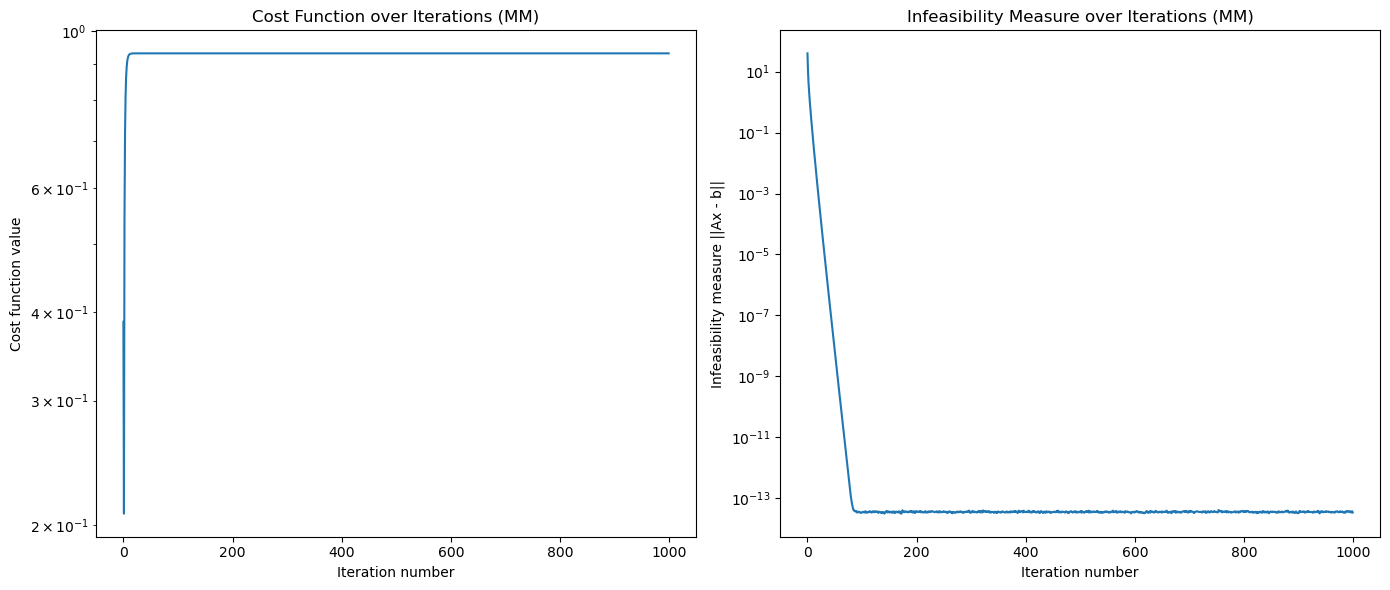

In [36]:
# Update x by minimizing the augmented Lagrangian
def update_x_mm(A, b, lamb, rho, x):
    Q = 2*np.eye(n) + rho * A.T @ A
    p = - A.T @ lamb - rho * A.T @ b
    # return np.linalg.inv(Q) @ p
    return np.linalg.solve(Q, p)

# Update lambda
def update_lambda_mm(lamb, A, x, b, rho):
    return lamb + rho * (A @ x - b)

# Method of Multipliers
def method_of_multipliers(A, b, rho, epochs=1000):
    lamb = np.zeros((m, 1)) 
    x = np.zeros((n, 1))
    cost_history = []
    infeasibility_history = []

    for _ in range(epochs):
        x = update_x_mm(A, b, lamb, rho, x)
        lamb = update_lambda_mm(lamb, A, x, b, rho)
        
        # Record the cost and infeasibility
        cost_history.append(cost_function(x).item())
        infeasibility_history.append(np.linalg.norm(A @ x - b).item())

    return cost_history, infeasibility_history

# Run the algorithm
cost_history_mm, infeasibility_history_mm = method_of_multipliers(A, b, rho=0.01, epochs=1000)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_history_mm)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Cost Function over Iterations (MM)')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(infeasibility_history_mm)
plt.xlabel('Iteration number')
plt.ylabel('Infeasibility measure ||Ax - b||')
plt.title('Infeasibility Measure over Iterations (MM)')
plt.yscale('log')

plt.tight_layout()
plt.show()


## (e)

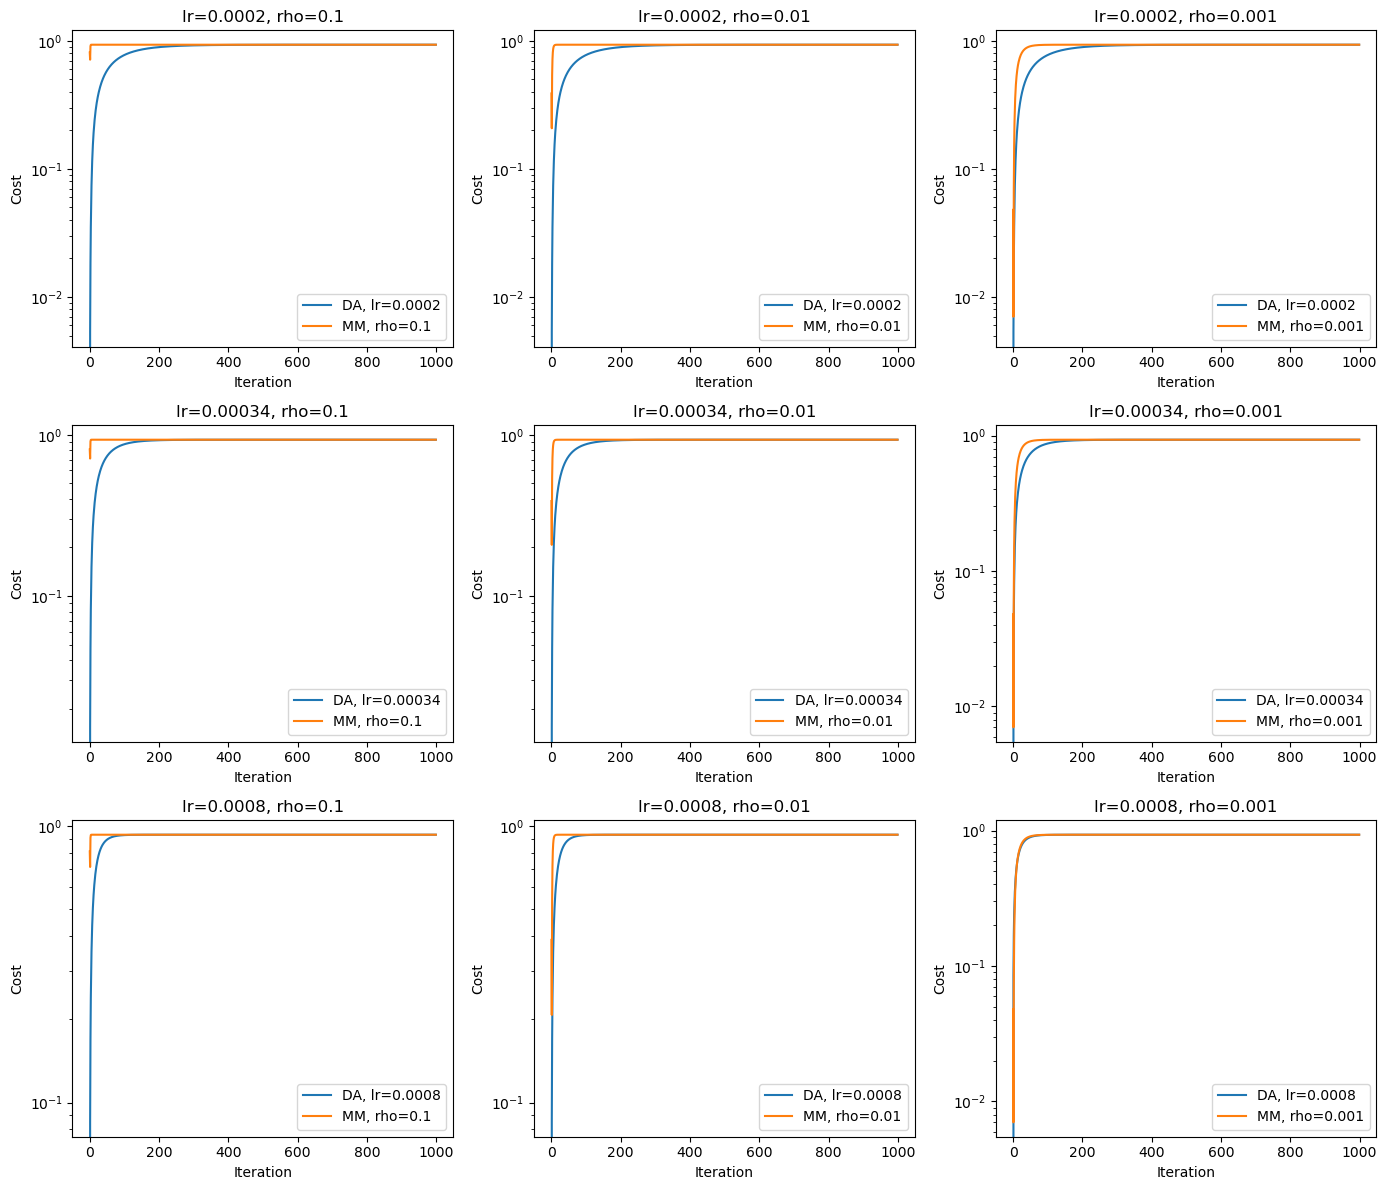

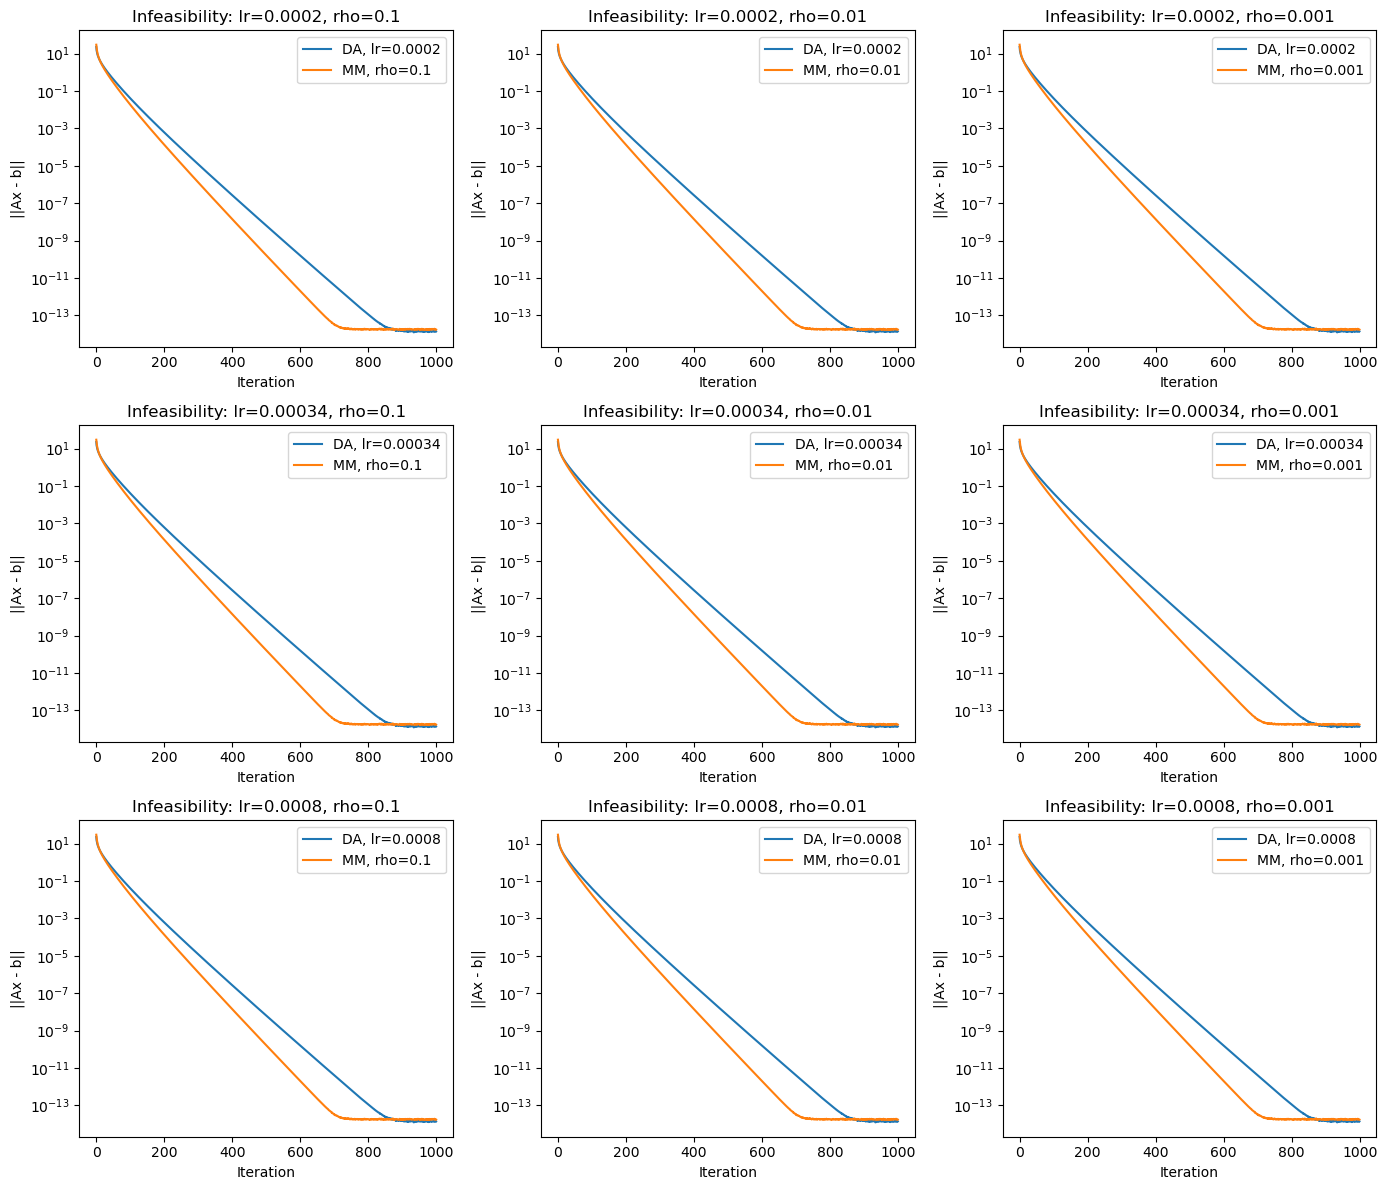

In [37]:
# Parameter sets for experimentation 
alphas = [0.0002, 0.00034, 0.0008]  # 1 / np.linalg.norm(A, ord=2)**2 = 0.000344
rhos = [0.1, 0.01, 0.001]

# best alpha = 0.0008
# best rhos = 

plt.figure(figsize=(14, 12))

for i, alpha in enumerate(alphas):
    for j, rho in enumerate(rhos):
        # Run Dual Ascent
        da_cost, da_infeasibility = dual_ascent(A, b, alpha, epochs=1000)

        # Run Method of Multipliers
        mm_cost, mm_infeasibility = method_of_multipliers(A, b, rho, epochs=1000)
        
        # Plotting
        plt.subplot(len(alphas), len(rhos), i*len(rhos)+j+1)
        plt.plot(da_cost, label=f'DA, lr={alpha}')
        plt.plot(mm_cost, label=f'MM, rho={rho}')
        plt.title(f'lr={alpha}, rho={rho}')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.yscale('log')
        plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 12))

for i, alpha in enumerate(alphas):
    for j, rho in enumerate(rhos):
        
        # Plotting for Infeasibility
        plt.subplot(len(alphas), len(rhos), i*len(rhos)+j+1)
        plt.plot(da_infeasibility, label=f'DA, lr={alpha}')
        plt.plot(mm_infeasibility, label=f'MM, rho={rho}')
        plt.title(f'Infeasibility: lr={alpha}, rho={rho}')
        plt.xlabel('Iteration')
        plt.ylabel('||Ax - b||')
        plt.yscale('log')
        plt.legend()

plt.tight_layout()
plt.show()


In [38]:
print("best alpha: ", 0.0008)
print("best rho: ", 0.01)

best alpha:  0.0008
best rho:  0.01


### Observation:

In the setup of this problem, I would prefer Dual Ascent over the Method of Multipliers because, during the update steps that calculate the argmin for x, Dual Ascent is more computationally efficient. Here, x is given by $-0.5A^T λ $, while the Method of Multipliers requires solving $2I + ρ(A^TA)x = -A^T λ - ρ A^Tb$.
However, the downside of Dual Ascent can be seen from the plots above: ∥Ax−b∥ only starts to converge after 1000 iterations, while the Method of Multipliers converges around 700 iterations. This behavior may be due to the stability introduced by the consistent use of ρ for updates in the Method of Multipliers, where the same ρ used can create stability and bridge the two functions. However, as I experimented with different learning rates for Dual Ascent, a learning rate approaching 0.0008 can almost mimic the pattern of cost decrease observed in the Method of Multipliers. Moreover, retraining the Method of Multipliers is 60 times the cost of one Dual Ascent iteration. When focusing on the Infeasibility measurement plots, we can observe that different values of ρ and α produce almost identical plots. In summary, in terms of computational cost and performance, Dual Ascent in this problem setup would be more preferable over the Method of Multipliers based on my observations.
